# 패키지 설치

In [67]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore')

In [108]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

!apt-get update
!apt install chromium-chromedriver

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [107]:
# 패키지 설치
#!pip install matplotlib
#!pip install wordcloud
#!pip install selenium
from bs4 import BeautifulSoup
import requests
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 
import matplotlib.font_manager as fm
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk import Text
from wordcloud import STOPWORDS
from PIL import Image
import time
from selenium import webdriver

     |████████████████████████████████| 911kB 7.9MB/s 


# 크롤링 함수

In [95]:
# Beautiful Soup 데이터 크롤링 함수

def get_content(url, selector):
  headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}
  html = requests.get(url, headers=headers).text
  soup = BeautifulSoup(html, 'html.parser')
  #print(soup)

  content = soup.select(selector)
  content_text = []
  for data in content:
    #print(data.text) # text만 끊어오기
    content_text.append(data.text)

  try:
    return content_text[0]
  except:
    return ''

In [114]:
# Selenium 데이터 크롤링 함수

def get_content_scroll(url, selector):
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    browser = webdriver.Chrome('chromedriver', chrome_options=chrome_options)

    browser.get(url)
    browser.maximize_window()
    prev_height = browser.execute_script("return document.body.scrollHeight")

    # 웹페이지 맨 아래까지 무한 스크롤
    i = 0
    while True:
        # 스크롤을 화면 가장 아래로 내린다
        browser.execute_script("window.scrollTo(0,document.body.scrollHeight)")

        # 페이지 로딩 대기
        time.sleep(2)
        i += 1
        # 현재 문서 높이를 가져와서 저장
        curr_height = browser.execute_script("return document.body.scrollHeight")

        if (curr_height == prev_height):
            break
        elif (i > 50):
            break
        else:
            prev_height = browser.execute_script("return document.body.scrollHeight")

    html = browser.page_source
    headers = {'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/89.0.4389.82 Safari/537.36'}
    soup = BeautifulSoup(html, 'html.parser')
    content = soup.select(selector)
    
    content_text = []
    for data in content:
      #print(data.text) # text만 끊어오기
      content_text.append(data.text)

    try:
      return content_text[0]
    except:
      return ''


# 텍스트 마이닝 패키지

In [71]:
# 텍스트 마이닝 패키지 설치
!pip install konlpy
from konlpy.tag import Okt
from konlpy.tag import Kkma
from nltk import Text

#### 형태소 분석기
kkma = Kkma()
t = Okt()

# 잇다 itdaa

## url들

In [72]:
itdaa_url_list = []

for i in range(2826, 3070, 1):
  
  url = 'https://www.itdaa.net/open_mentorings/' + str(i) + '?ref=contents_all'
  itdaa_url_list.append(url)

print(itdaa_url_list)

['https://www.itdaa.net/open_mentorings/2826?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2827?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2828?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2829?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2830?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2831?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2832?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2833?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2834?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2835?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2836?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2837?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2838?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2839?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2840?ref=contents_all', 'https://www.itdaa.net/open_mentorings/2841?ref=conten

## 크롤링

In [80]:
#@title
itdaa_all_content_text = ''

for url in itdaa_url_list:
  content_text = get_content(url, '#openMentoringBlockContainer')
  itdaa_all_content_text = itdaa_all_content_text + content_text

In [74]:
data.text

'\n\n          #홍보/CSR\n\n\n          #진로\n\n\n          현직자 멘토가 전하는 BTL 마케팅 - 필요 역량과 특징은? \n        \n\n\n\n\n멘토님 안녕하세요! 저는 신입으로 취업 준비하고 있는 취준생입니다. 저는 실내건축디자인학과를 졸업했고 같은 학과 대학원에 진학해서 프로젝트로 해외 인테리어 페어 전시를 3번 기획했습니다.\xa0\n\xa0\n학생 파트라 규모가 크진 않았지만, 그 경험을 통해서 광고 회사의 BTL 기획 직무에 관심을 가지게 되었습니다! BTL에 대한 정보도 너무 없고 시국이 시국인지라 여기서 멘토님을 찾게 되어 이렇게 질문 남겨 봅니다!\n\n\n\xa0©️Eleni Afiontzi\n\n1. BTL, 프로모션 기획에 있어 중요한 역량이 무엇이라고 생각하시나요? 어떤 사람들이 회사에서 성과를 내고 있는지 궁금합니다.\n\xa0\n2. 저는 공간, 인테리어 관련 전공에 공모전이나 인턴도 인테리어 관련해서만 경험을 가지고 있습니다.. 광고 공모전이나 인턴 경험이 없는데 경쟁력을 가질 수 있을까요?\n\xa0\n3. BTL 오프라인 기획 직무로 어떤 성장 계획을 세울 수 있는지 궁금합니다. 직급 체계가 어떻게 구성되는지, 시기별 업무 내용이 어떻게 되는데 대략 말씀해주시면 감사하겠습니다.\n\xa0\n질문이 너무 두서없거나, 많은 건 아닌가 싶네요.. 답변이 어려우실 수도 있겠지만 가능하시면 꼭 답변 부탁드립니다! 감사합니다.\n\n\n*BTL (Below The Line) : 이벤트, 전시, 스폰서쉽, PPL 등의 활동을 하면서 미디어를 대상으로 홍보를 하지 않는 방식을 뜻한다.\xa0\n\n\n'

## 텍스트마이닝

In [113]:
# 명사 추출
itdaa_nouns = t.nouns(itdaa_all_content_text)

In [83]:
# Trim words: 한 글자 짜리 빼기
itdaa_nouns_trimmed = []
for word in itdaa_nouns:
  if len(word) <= 1:
    continue
  else:
    itdaa_nouns_trimmed.append(word)

print(len(itdaa_nouns), len(itdaa_nouns_trimmed))

103851 83730


## 빈도수 많은 단어 추출

In [84]:
# 가장 빈도수 많은 단어 순으로 줄세우기 
itdaa_nouns_most_common = nltk.Text(itdaa_nouns_trimmed).vocab().most_common()
itdaa_nouns_most_common = pd.DataFrame(itdaa_nouns_most_common, columns=['단어', '빈도수'])
itdaa_nouns_most_common[itdaa_nouns_most_common['빈도수']>1]

,단어,빈도수
0,멘토,1461
1,답변,1223
2,생각,930
3,직무,928
4,경험,915
...,...,...
3439,포럼,2
3440,명사,2
3441,초청,2
3442,합숙,2


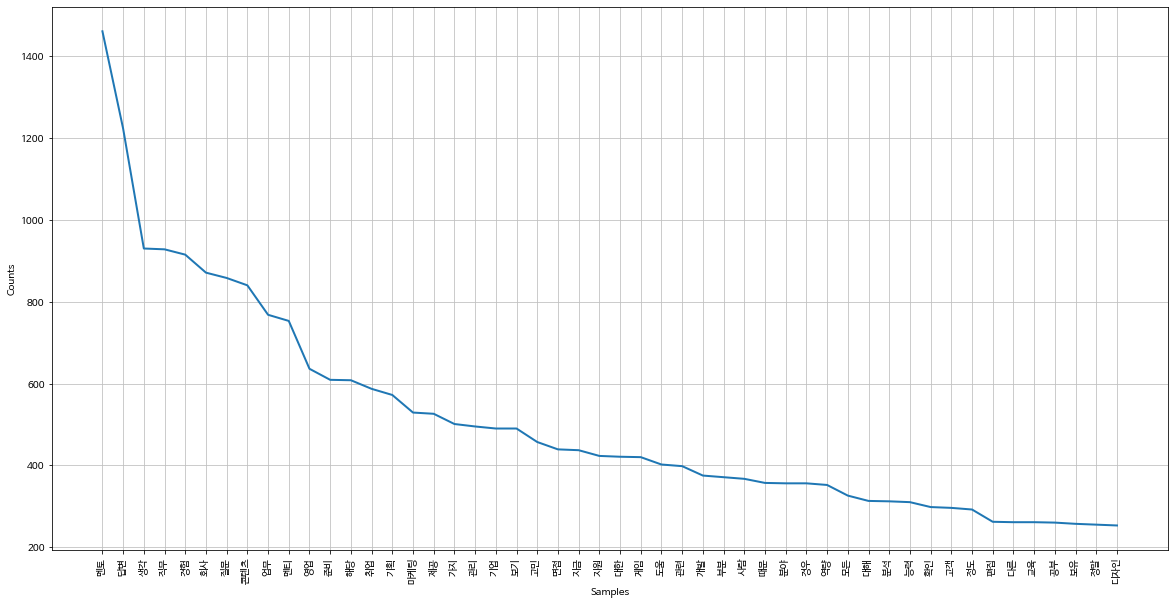

In [85]:
# Frequency distribution

from nltk.probability import FreqDist

fdist = FreqDist()
for word in itdaa_nouns_trimmed:
  fdist[word.lower()] += 1

plt.figure(figsize=(20,10))
fdist.plot(50)
plt.show()

# 블라인드

## url들

In [96]:
blind_url_list = ['https://www.teamblind.com/kr/topics/%EC%9D%B4%EC%A7%81%C2%B7%EC%BB%A4%EB%A6%AC%EC%96%B4']

print(blind_url_list)

['https://www.teamblind.com/kr/topics/%EC%9D%B4%EC%A7%81%C2%B7%EC%BB%A4%EB%A6%AC%EC%96%B4']


## 크롤링

In [115]:
blind_all_content_text = ''

for url in blind_url_list:
  content_text = get_content_scroll(url, '#wrap > section > div > div > div.article-list')
  blind_all_content_text = blind_all_content_text + content_text

In [116]:
blind_all_content_text

''

## 텍스트마이닝

In [109]:
# 명사 추출
blind_nouns = t.nouns(blind_all_content_text)

In [110]:
# Trim words: 한 글자 짜리 빼기
blind_nouns_trimmed = []
stopwords_blind = ['댓글', '회수', '성시간', '북마크']

for word in blind_nouns:
  if len(word) <= 1:
    continue
  elif word in stopwords_blind:
    continue
  else:
    blind_nouns_trimmed.append(word)

print(len(blind_nouns), len(blind_nouns_trimmed))

1604 1126


## 빈도수 많은 단어 추출

In [111]:
# 가장 빈도수 많은 단어 순으로 줄세우기 
blind_nouns_most_common = nltk.Text(blind_nouns_trimmed).vocab().most_common()
blind_nouns_most_common = pd.DataFrame(blind_nouns_most_common, columns=['단어', '빈도수'])
blind_nouns_most_common[blind_nouns_most_common['빈도수']>1]

,단어,빈도수
0,연봉,24
1,회사,24
2,면접,23
3,이직,19
4,이번,11
...,...,...
214,시험,2
215,카카오,2
216,페이,2
217,직도,2


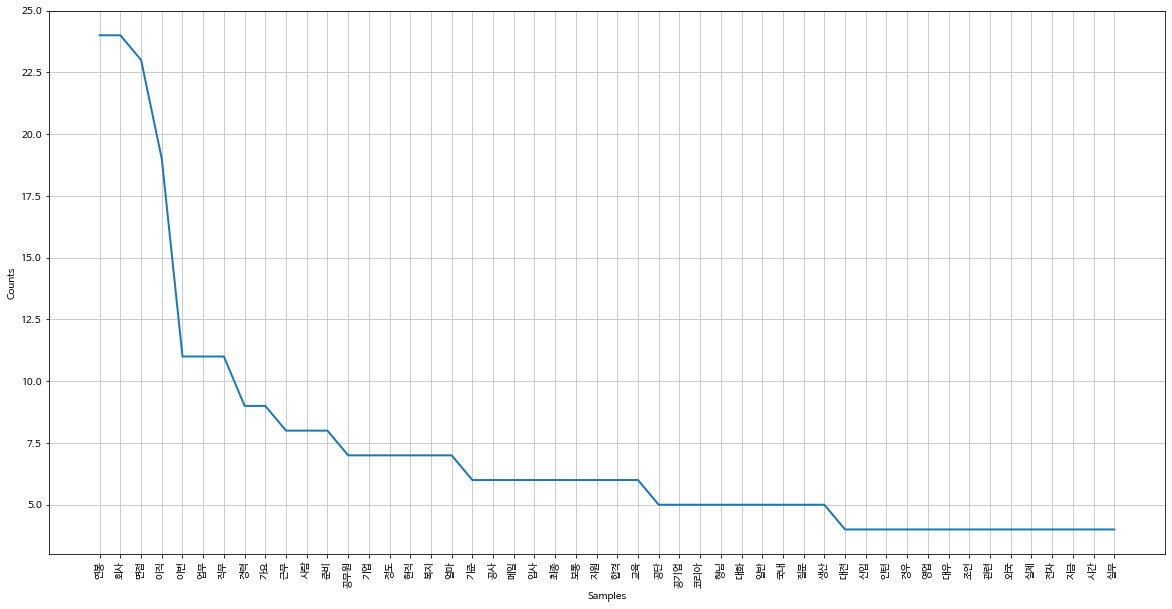

In [112]:
# Frequency distribution

from nltk.probability import FreqDist

fdist = FreqDist()
for word in blind_nouns_trimmed:
  fdist[word.lower()] += 1

plt.figure(figsize=(20,10))
fdist.plot(50)
plt.show()